<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab7.13.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_t
import seaborn as sns

# Problem 6

In [2]:
rv = multivariate_t([0.001, 0.002], [[0.1, 0.03], [0.03, 0.15]], df=5)
sample = rv.rvs(size=10000)
x, y = np.hsplit(sample,2)
R = (x+y)/2

## Distribution of Return

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9db79c35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9db79c3c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9db79c3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9db79d0370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9db79d0670>],
 'means': []}

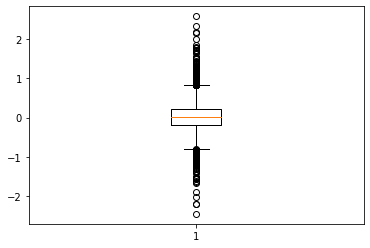

In [3]:
plt.boxplot(R)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   1.,   0.,
          0.,   0.,   0.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   1.,   1.,   2.,   1.,   5.,   2.,   1.,   2.,
          4.,   3.,   0.,   1.,   1.,   2.,   2.,   6.,   3.,   2.,   2.,
          3.,   6.,   3.,   0.,   3., 

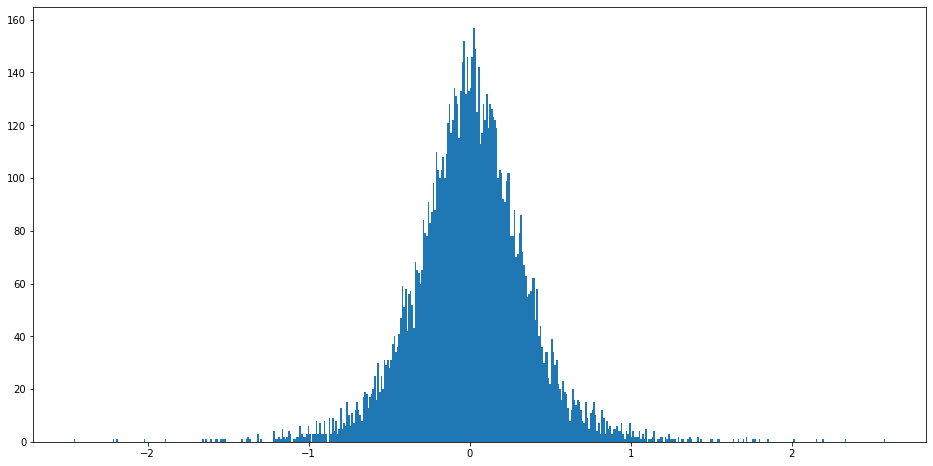

In [4]:
plt.figure(figsize=(16,8))
plt.hist(R, bins=500)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


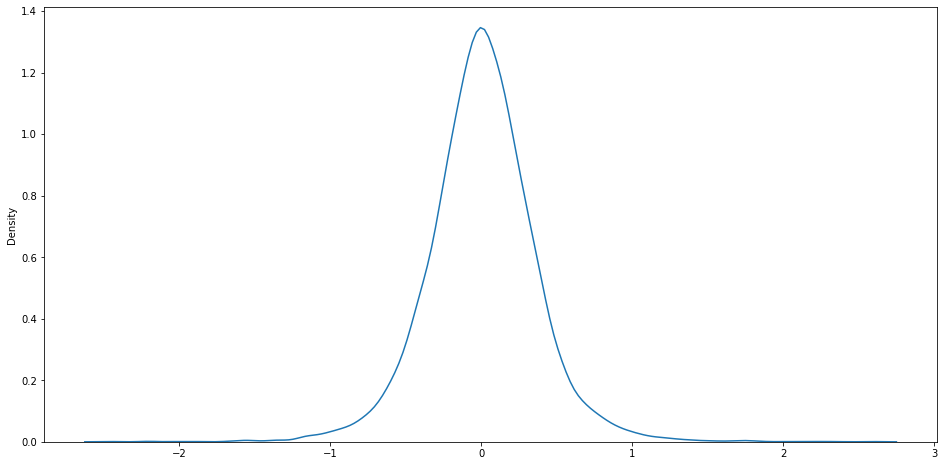

In [5]:
plt.figure(figsize=(16,8))
sns.distplot(R, hist=False)

## 0.01 Upper Quantile

In [6]:
np.quantile(R, 0.99)

0.9431767625079941

## Average of Top 1%

In [7]:
sum = 0
count = 0
q = np.quantile(R, 0.99)

for i in R:
  if i > q:
    sum += i
    count += 1

avg = sum/count
print(avg)

[1.24440267]


--------------------------------------------------------------------------------
# Problem 7

In [8]:
from scipy.optimize import minimize

In [9]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/CRSPday.csv'
data = pd.read_csv(url)
data.head()

,year,month,day,ge,ibm,mobil,crsp
0,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1,1989,1,4,0.017045,0.005128,0.005510,0.013016
2,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
3,1989,1,6,0.000000,-0.006135,0.002725,0.003064
4,1989,1,9,0.000000,0.004115,0.005435,0.001633


In [10]:
Y = data[['ibm', 'crsp']].to_numpy()
Y = np.transpose(Y)
print(Y)

[[ 0.        0.005128 -0.002041 ... -0.011229 -0.002004 -0.012718]
 [-0.007619  0.013016  0.002815 ...  0.011373 -0.00496   0.004976]]


In [11]:
def loglike(par):
  mu = np.array([par[0], par[1]])
  A = np.array([[par[2], par[3]], [0, par[4]]])
  scale = np.transpose(A) @ A
  df = par[5]
  rv = multivariate_t(mu, scale, df=df)
  return -np.sum(np.log(rv.pdf(np.transpose(Y))))

In [12]:
np.cov(Y)

array([[3.06130872e-04, 6.60209371e-05],
       [6.60209371e-05, 6.01912728e-05]])

In [13]:
A = np.linalg.cholesky(np.cov(Y))
start = np.concatenate((Y.mean(axis=1), np.array([A[0][0], A[0][1], A[1][1], 4])), axis=0)
bnds = ((-0.02, 0.02), (-0.02, 0.02), (-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.1), (2, 15))

In [14]:
res = minimize(loglike, x0=start, method="L-BFGS-B", bounds=bnds)

In [15]:
res

      fun: -16106.905357833388
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.43742465e+00,  9.78798198e-01, -1.92849257e+00, -1.66946847e+00,
       -4.01978468e+00,  4.36557460e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 175
      nit: 21
     njev: 25
   status: 0
  success: True
        x: array([4.34850156e-04, 8.52101687e-04, 1.24948670e-02, 2.64193682e-03,
       4.94600081e-03, 4.14672589e+00])

In [32]:
np.sqrt(np.diag(np.linalg.inv(res.hess_inv.todense())))

array([6.39917883e+02, 4.23938127e+03, 2.77315568e+03, 7.16797360e+03,
       5.23743745e+02, 7.02398895e-01])

## MLE of θ 

In [16]:
Ahat = np.array([[res.x[2], res.x[3]], [0, res.x[4]]])
print(Ahat)

[[0.01249487 0.00264194]
 [0.         0.004946  ]]


## (e) MLE of the covariance matrix

In [17]:
MLE_cov = (np.transpose(Ahat) @ Ahat)* (res.x[5]/(res.x[5]-2))
print("MLE")
print(MLE_cov)

MLE
[[3.01572688e-04 6.37650639e-05]
 [6.37650639e-05 6.07364376e-05]]


In [18]:
print("Real")
np.cov(Y)

Real


array([[3.06130872e-04, 6.60209371e-05],
       [6.60209371e-05, 6.01912728e-05]])

## (f) MLE of ρ 

In [19]:
rho = MLE_cov[0][1] / np.sqrt(MLE_cov[0][0]*MLE_cov[1][1])
print("MLE")
print(rho)

MLE
0.47115319187811966


In [20]:
print("Real")
np.corrcoef(Y)

Real


array([[1.        , 0.48636393],
       [0.48636393, 1.        ]])